K-MEANS CUSTOMER CLUSTERING

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv(r"data/Mall_Customers.csv")
print(data.shape)
print("Features count:",data.shape[1])
print("Raw count:",data.shape[0])

data.head()

(200, 5)
Features count: 5
Raw count: 200


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
data = pd.get_dummies(data)

In [7]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [8]:
data = data.drop('CustomerID',axis=1)

In [9]:
data.corr()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
Age,1.000000,-0.012398,-0.327227,-0.060867,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,-0.056410,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,0.058109,-0.058109
Gender_Female,-0.060867,-0.056410,0.058109,1.000000,-1.000000
Gender_Male,0.060867,0.056410,-0.058109,-1.000000,1.000000


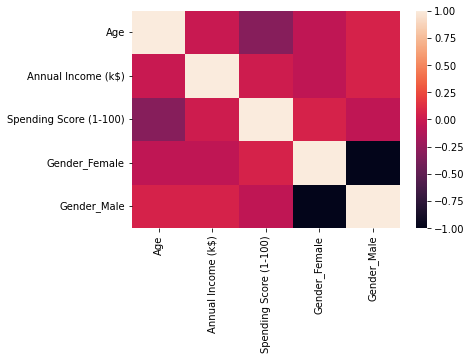

In [10]:
sns.heatmap(data.corr());

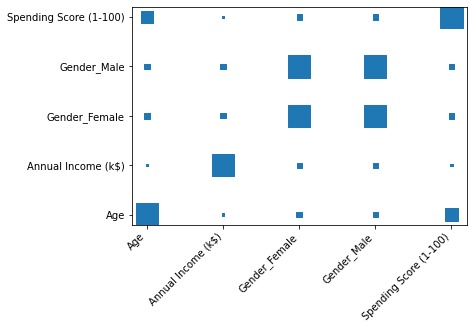

In [11]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data1 = data
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Female','Gender_Male']
corr = data1[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [12]:
# Drop high corr columns
dataOriginal = data.drop('Gender_Male',axis=1)
dataOriginal.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [13]:
scaler = MinMaxScaler().fit_transform(dataOriginal)

In [14]:
dataScale = pd.DataFrame(scaler)

In [15]:
dataScale.head()

,0,1,2,3
0,0.019231,0.000000,0.387755,0.0
1,0.057692,0.000000,0.816327,0.0
2,0.038462,0.008197,0.051020,1.0
3,0.096154,0.008197,0.775510,1.0
4,0.250000,0.016393,0.397959,1.0


In [16]:
dataScale.columns = ['Age','Annual_Income','Spending_Score','Gender_Female']
dataScale = dataScale.reindex(columns=['Age','Annual_Income','Spending_Score','Gender_Female'])

In [17]:
dataScale.head()

,Age,Annual_Income,Spending_Score,Gender_Female
0,0.019231,0.000000,0.387755,0.0
1,0.057692,0.000000,0.816327,0.0
2,0.038462,0.008197,0.051020,1.0
3,0.096154,0.008197,0.775510,1.0
4,0.250000,0.016393,0.397959,1.0


In [18]:
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 1  , algorithm='elkan') )
    algorithm.fit(dataScale)
    inertia.append(algorithm.inertia_)

c:\Users\enes_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1323: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


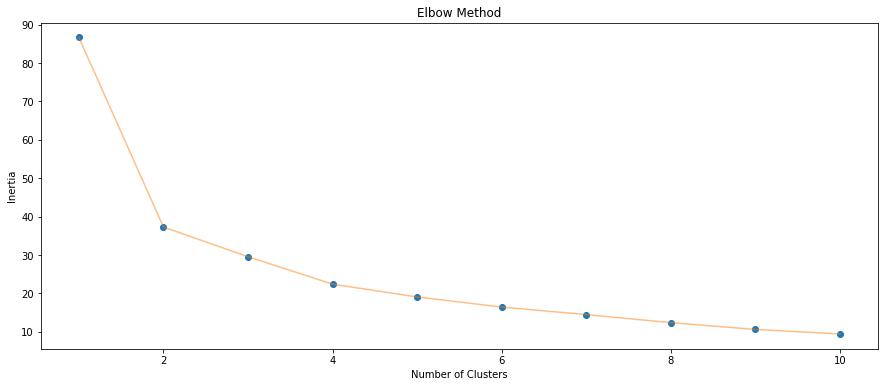

In [19]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

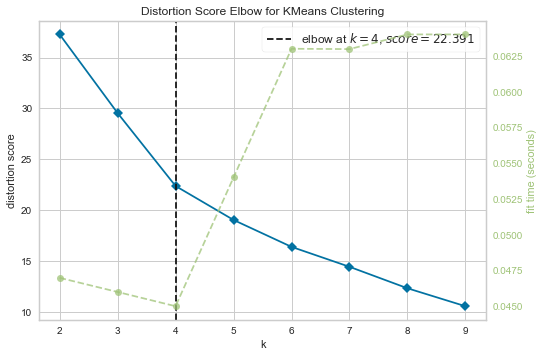

In [21]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(dataScale)
visualizer.show()
plt.show()

c:\Users\enes_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

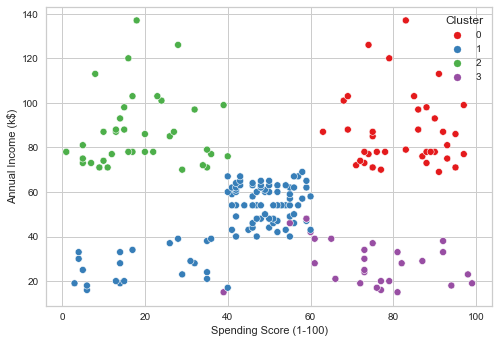

In [22]:
KMeansBest = KMeans(n_clusters=4,init='k-means++').fit(dataOriginal)
KM5_clustered = dataOriginal[['Age','Annual Income (k$)','Spending Score (1-100)']].copy()
KM5_clustered.loc[:,'Cluster'] = KMeansBest.labels_ # append labels to points
sns.scatterplot('Spending Score (1-100)', 'Annual Income (k$)', data=KM5_clustered,
                hue='Cluster', palette='Set1', legend='full')

c:\Users\enes_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

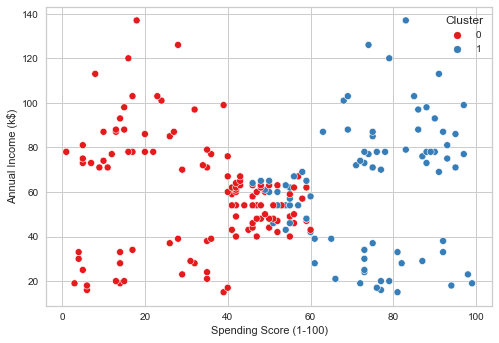

In [23]:
KMeansBest = KMeans(n_clusters=2,init='k-means++').fit(dataOriginal)
KM5_clustered = dataOriginal[['Age','Annual Income (k$)','Spending Score (1-100)']].copy()
KM5_clustered.loc[:,'Cluster'] = KMeansBest.labels_
sns.scatterplot('Spending Score (1-100)', 'Annual Income (k$)', data=KM5_clustered,
                hue='Cluster', palette='Set1', legend='full')

c:\Users\enes_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

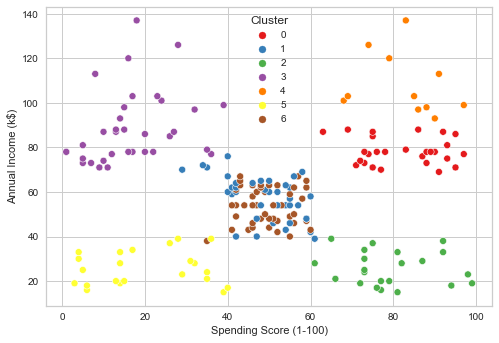

In [24]:
KMeansBest = KMeans(n_clusters=7,init='k-means++').fit(dataOriginal)
KM5_clustered = dataOriginal[['Age','Annual Income (k$)','Spending Score (1-100)']].copy()
KM5_clustered.loc[:,'Cluster'] = KMeansBest.labels_
sns.scatterplot('Spending Score (1-100)', 'Annual Income (k$)', data=KM5_clustered,
                hue='Cluster', palette='Set1', legend='full')